In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Importing the dataset
df = pd.read_csv('gold_prices.csv')
df.head()

,Date,Price
0,2005-01-01,421.799988
1,2005-02-01,436.500000
2,2005-03-01,428.700012
3,2005-04-01,435.000000
4,2005-06-01,435.899994


In [11]:
# keep only closing price and remove missing values
df = df[['Price']]
df = df.dropna()
df.head()

,Price
0,421.799988
1,436.500000
2,428.700012
3,435.000000
4,435.899994


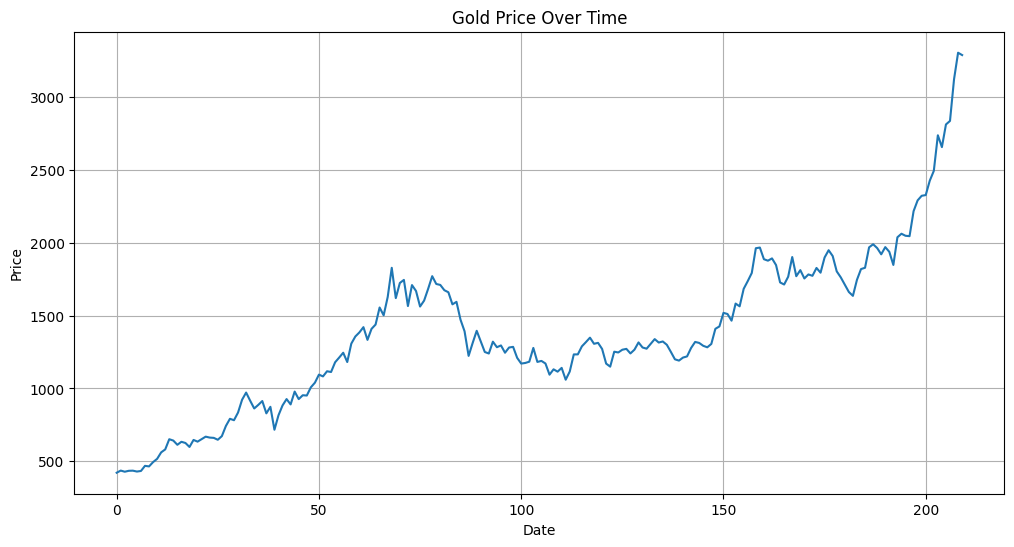

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

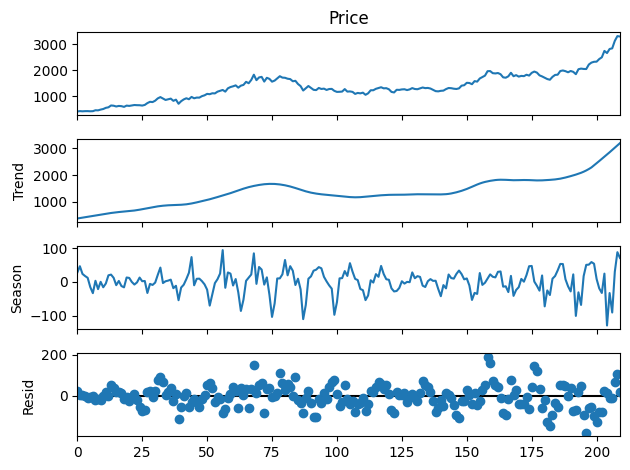

In [13]:
# STL Decomposition
stl = STL(df['Price'], period=12)
res = stl.fit()
res.plot()
plt.show()

In [14]:
# ADF Test for Stationarity
result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.535441
p-value: 0.997650


In [15]:
# Differencing to make series stationary
df['Price_diff'] = df['Price'].diff()
df = df.dropna()

In [18]:
# Fitting the ARIMA Model (BASIC)
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()

In [19]:
# Forecasting using ARIMA
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)


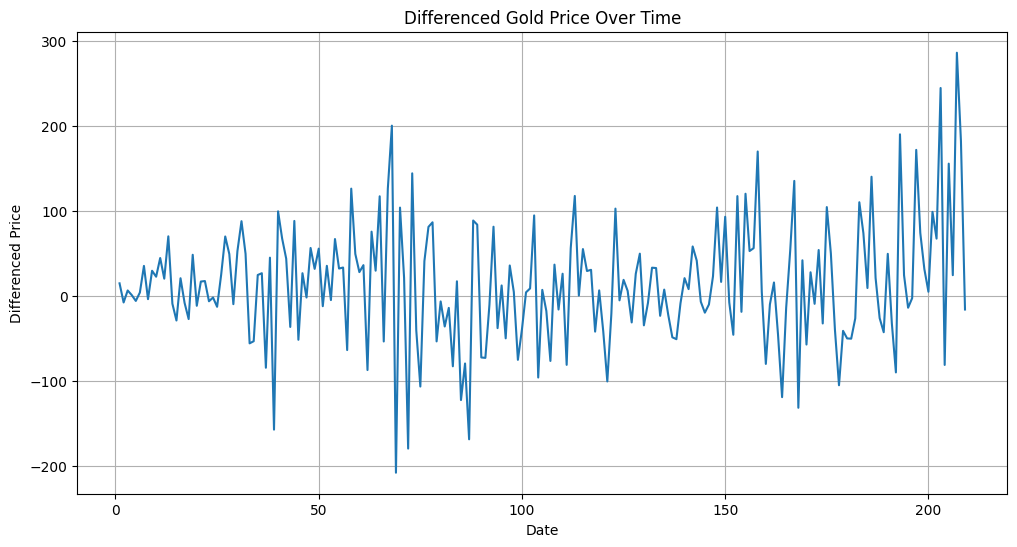

In [32]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Price_diff'])
plt.title('Differenced Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.grid(True)

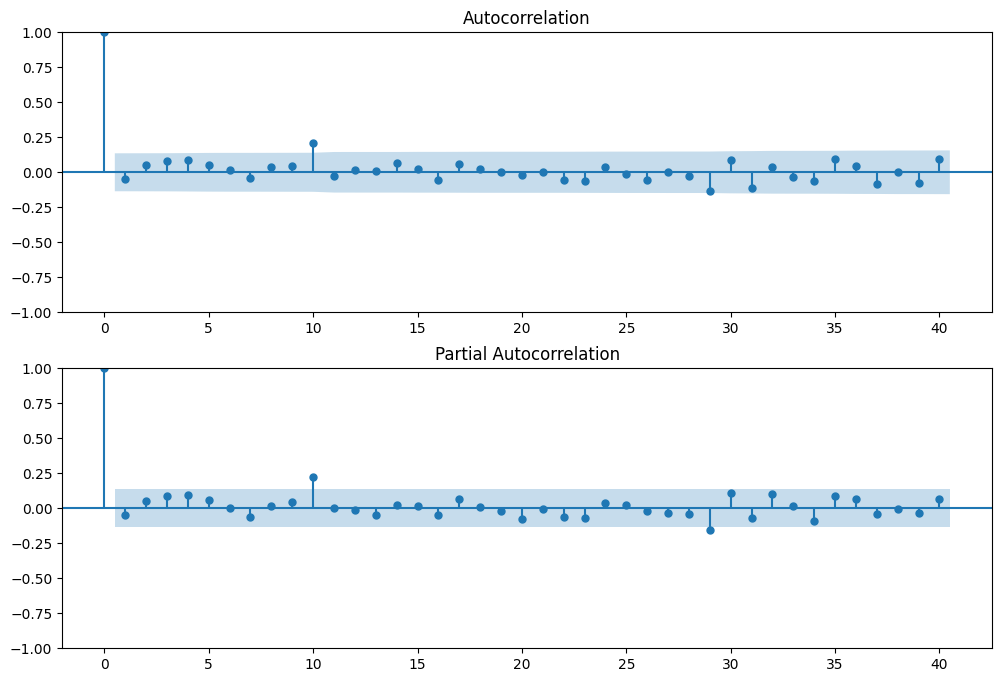

In [33]:
# ACF and PACF Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Price_diff'], lags=40, ax=ax1)
plot_pacf(df['Price_diff'], lags=40, ax=ax2)
plt.show()

In [41]:
# Fitting the ARIMA Model (BASIC)
arima_model_fit = ARIMA(df['Price'], order=(1, 1, 1)).fit()

In [35]:
# Forecasting using ARIMA
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

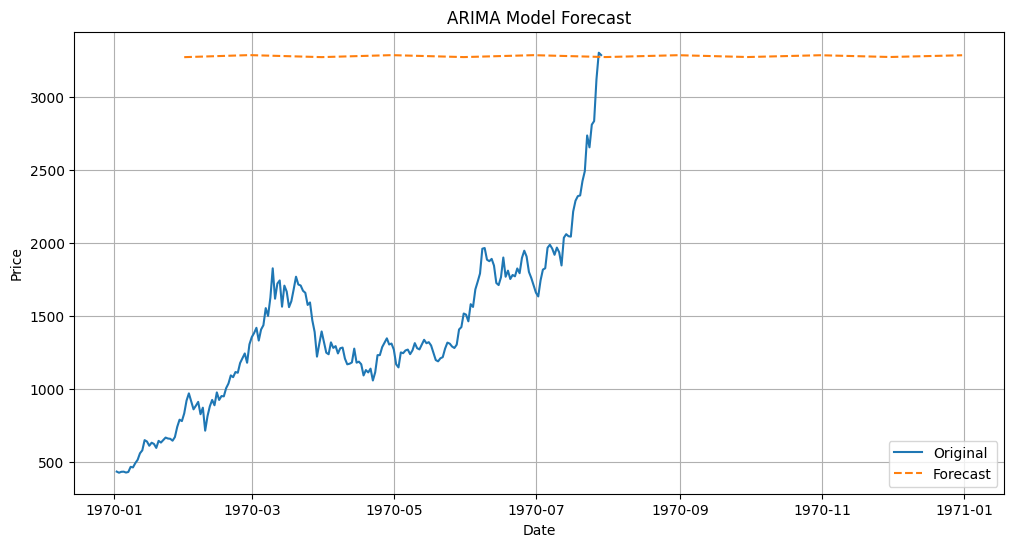

In [36]:
# ARIMA Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Original')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Forecasting with SARIMA
sarima_model_fit = SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

In [47]:
# Fitting the SARIMA Model
sarima_model_fit = SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

In [48]:
# Model Comparison
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Get AIC for both models
arima_aic = arima_model_fit.aic
sarima_aic = sarima_model_fit.aic

print(f"ARIMA AIC: {arima_aic}")
print(f"SARIMA AIC: {sarima_aic}")

# You can also calculate RMSE on a test set if you split your data
# For simplicity, we'll compare AIC here

ARIMA AIC: 2380.267597054969
SARIMA AIC: 2274.1380599066224


In [49]:
# Select the model based on lesser AIC
if arima_model_fit.aic < sarima_model_fit.aic:
    selected_model = arima_model_fit
else:
    selected_model = sarima_model_fit

# SAving the model in pickle  file format
import pickle
with open('gold_price_model.pkl', 'wb') as file:
    pickle.dump(selected_model, file)